<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine_Learning/blob/main/23485051_Lab2(AML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the necessary libraries**

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [76]:
#Importing the dataset
data = pd.read_csv("/content/Program_2_Dataset.csv")
data.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.06860,0.0,2.89,0,0.445,7.416,62.5,3.4952,2,276,18.0,396.90,6.19,33.2
1,0.14866,0.0,8.56,0,0.520,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,0.11432,0.0,8.56,0,0.520,6.781,71.3,2.8561,5,384,20.9,395.58,7.67,26.5
3,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384,20.9,70.80,10.63,18.6
4,0.21161,0.0,8.56,0,0.520,6.137,87.4,2.7147,5,384,20.9,394.47,13.44,19.3


In [88]:
data.describe()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [89]:
  data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Crime_Rate        506 non-null    float64
 1   Zone_proportion   506 non-null    float64
 2   Non_Retail_Acres  506 non-null    float64
 3   CHAS              506 non-null    int64  
 4   NOX               506 non-null    float64
 5   Avg_rooms         506 non-null    float64
 6   AGE               506 non-null    float64
 7   Distance          506 non-null    float64
 8   RAD               506 non-null    int64  
 9   Property_TaxRate  506 non-null    int64  
 10  PTRATIO           506 non-null    float64
 11  B                 506 non-null    float64
 12  LSTAT             506 non-null    float64
 13  MValue            506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [90]:
data.shape

(506, 14)

**Calculating Variance Inflation Factor for each of the Predictor Variables:**

The VariaNce Inflation Factor checks the severity of multicollinearity. A VIF of greater than 8 indicate perfect multicollinearity. The multiple linear regression has some basic assumptions such as no perfect multicollinearity, as it can affect the coefficient estimates. Here we can see that the predictor variables, "Avg_rooms" and "Property_TaxRate" have high VIF, suggesting strong correlation, so we can remove them from our linear regression model.



In [14]:
X = data[['Avg_rooms ','Distance', 'Property_TaxRate','Non_Retail_Acres']]
vif = pd.DataFrame()
vif["feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]
vif

            feature        VIF
0        Avg_rooms   16.747965
1          Distance   6.880607
2  Property_TaxRate  13.861510
3  Non_Retail_Acres   9.598374


As we can see, upon removing the predictors with high VIF, the VIF of the other predictor variables have decreased.

In [11]:
X = X.drop(columns=["Avg_rooms ","Property_TaxRate"])
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
						for i in range(len(X.columns))]
print(vif_data)

            feature       VIF
0          Distance  1.468836
1  Non_Retail_Acres  1.468836


**Visualising A Scatter Plot of Predictor Variable with the Dependent Variable**

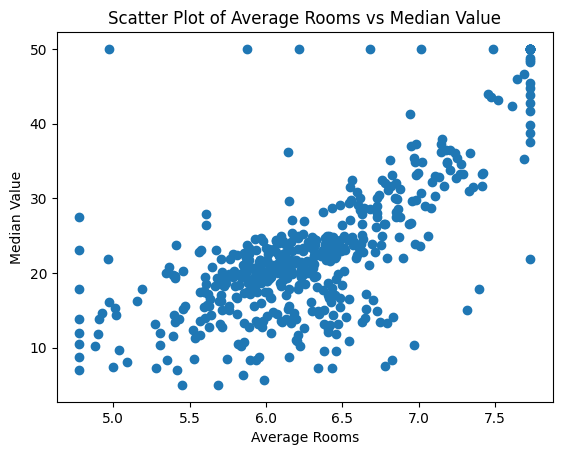

In [55]:
plt.scatter(x["Avg_rooms "],y)
plt.xlabel("Average Rooms")
plt.ylabel("Median Value")
plt.title("Scatter Plot of Average Rooms vs Median Value")
plt.show()

This indicates a linear relationship between Avg_rooms and MValue so basic assumptions of linear regression is followed.

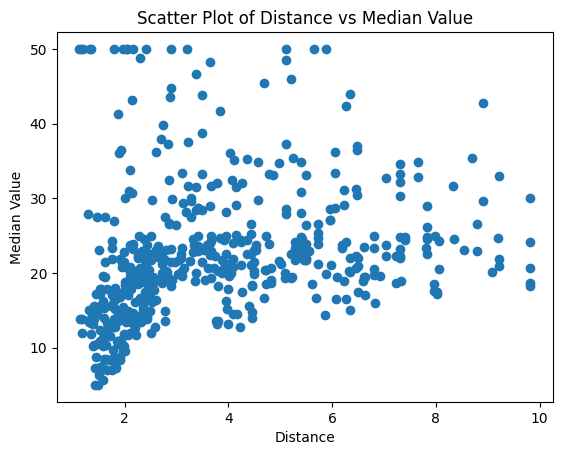

In [56]:
plt.scatter(x["Distance"],y)
plt.xlabel("Distance")
plt.ylabel("Median Value")
plt.title("Scatter Plot of Distance vs Median Value")
plt.show()

This also indicates a somewhat linear relationship between Distance and MValue

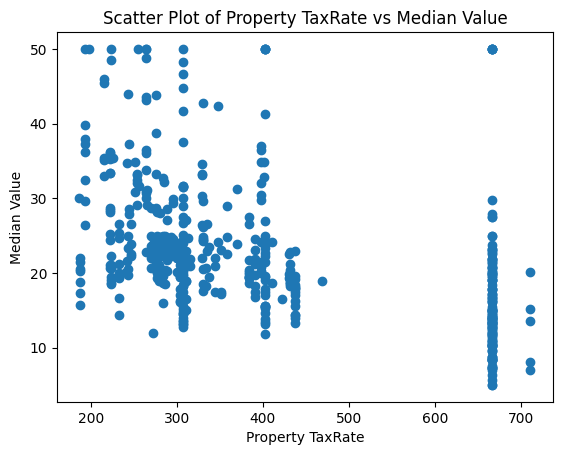

In [59]:
plt.scatter(data["Property_TaxRate"],y)
plt.xlabel("Property TaxRate")
plt.ylabel("Median Value")
plt.title("Scatter Plot of Property TaxRate vs Median Value")
plt.show()

This does not indicate any linear relationship between Property TaxRate and MValue, thus violating the assumption of linear regression

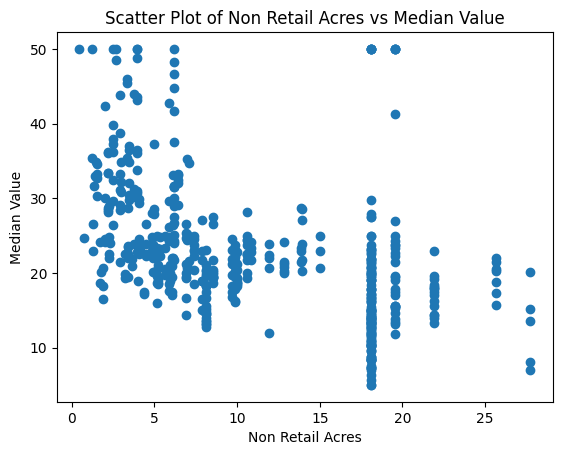

In [60]:
plt.scatter(data["Non_Retail_Acres"],y)
plt.xlabel("Non Retail Acres")
plt.ylabel("Median Value")
plt.title("Scatter Plot of Non Retail Acres vs Median Value")
plt.show()

In [78]:
x1 = data[["Distance","Non_Retail_Acres"]]
y = data["MValue"]
xtrain,xtest,ytrain,ytest = train_test_split(x1,y,test_size=0.33)

In [79]:
model1 = LinearRegression()
model1.fit(xtrain,ytrain)

LinearRegression()

In [80]:
pred1 = model1.predict(xtest)
df_preds = pd.DataFrame({'Actual': ytest.squeeze(), 'Predicted': pred1.squeeze()})
df_preds.head()

,Actual,Predicted
220,21.0,23.165188
490,14.3,18.046339
120,23.0,20.491457
121,26.7,27.387852
69,23.8,17.033372


**Model Evaluation**

In [81]:
#MAE is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
mae = mean_absolute_error(ytest,pred1)
#MSE measures the average of the squares of the errors
mse = mean_squared_error(ytest,pred1)
#RMSE measures the average difference between values predicted by a model and the actual values
rmse = np.sqrt(mse)
print(f'The Mean Absolute error:{mae:.2f}')
print(f'The Mean Squared Error:{mse:.2f}')
print(f'The Root Mean Squared Error:{rmse:.2f}')

The Mean Absolute error:6.05
The Mean Squared Error:66.41
The Root Mean Squared Error:8.15


In [102]:
print("Model Intercept",model1.intercept_)
print("Model Slope",model1.coef_)

Model Intercept 35.420735480026636
Model Slope [-1.00627992 -0.8311632 ]


In [82]:
r2 = r2_score(ytest,pred1)
adj_r2 = 1-(1-model1.score(xtest,ytest))*(len(ytest)-1)/(len(ytest)-xtest.shape[1]-1)
#It is a statistical measure in a regression model that determines the proportion of variance in the dependent variable that can be explained by the independent variable
print("The R-Squared value is ",r2)
#it is a modified version of r-squared that has been adjusted for the number of predictors in the model
print("The Adjusted R-Squared value is ",adj_r2)

The R-Squared value is  0.24629520319467502
The Adjusted R-Squared value is  0.237103681282415


As we can see that the R-Squared value is very less. The model has only been able to explain 24% of the test dataset. This says that while multicollinearity is an important assumption of linear regression, it doesn't affect the accuracy of our model. If we remove multicollinearity, then it does not guarantee that our model will provide us with more accuracy. But there are some ways to elevate model accuracy:



1.   Detecting Outliers and Removing them
2.   Using Recursive Feature Elimination
3. Normalising our Predictor Variables



**Detecting Outliers and Removing Them**

{'whiskers': [<matplotlib.lines.Line2D at 0x7a1ccad36b30>,
 'caps': [<matplotlib.lines.Line2D at 0x7a1cca6621d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a1ccad35330>],
 'medians': [<matplotlib.lines.Line2D at 0x7a1cca663850>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a1cca662e60>],
 'means': []}

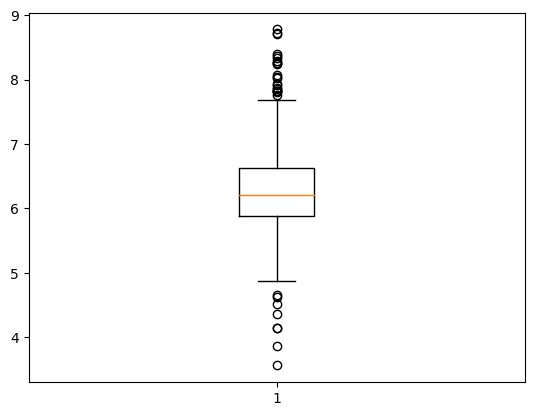

In [83]:
plt.boxplot(data["Avg_rooms "])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a1cc9ec6c50>,
 'caps': [<matplotlib.lines.Line2D at 0x7a1cc9ec59f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a1cc9ec6da0>],
 'medians': [<matplotlib.lines.Line2D at 0x7a1cc9ec4be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a1cc9ec5930>],
 'means': []}

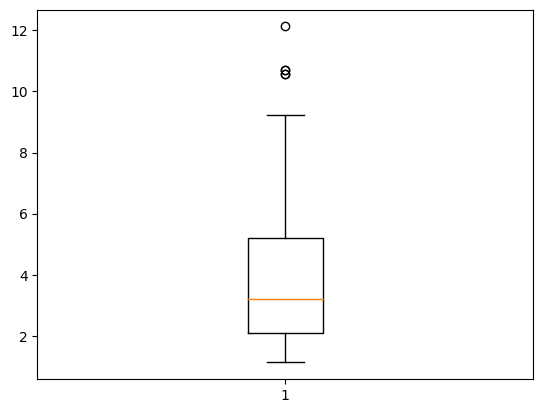

In [84]:
plt.boxplot(data["Distance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a1cca64f5e0>,
 'caps': [<matplotlib.lines.Line2D at 0x7a1d07a63cd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a1cca64ff40>],
 'medians': [<matplotlib.lines.Line2D at 0x7a1cc9f438e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a1cc9f40640>],
 'means': []}

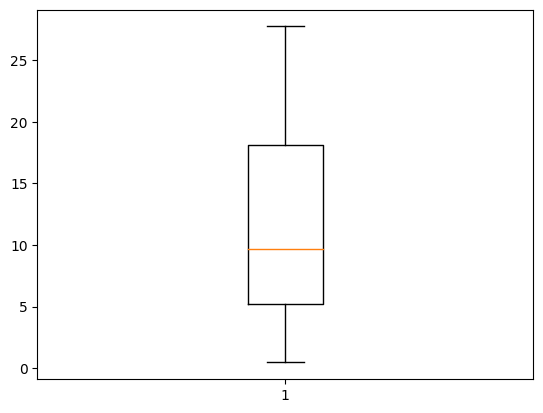

In [85]:
plt.boxplot(data["Non_Retail_Acres"])

{'whiskers': [<matplotlib.lines.Line2D at 0x7a1ccad58340>,
 'caps': [<matplotlib.lines.Line2D at 0x7a1ccad584c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7a1ccad58670>],
 'medians': [<matplotlib.lines.Line2D at 0x7a1cc9fe5c00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7a1cc9fe7190>],
 'means': []}

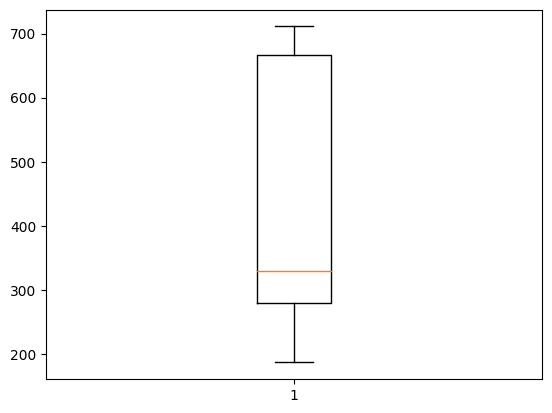

In [87]:
plt.boxplot(data["Property_TaxRate"])

In [36]:
Q1 = data["Distance"].quantile(0.25)
Q3 = data["Distance"].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 -(width*IQR)
upper = Q3 + (width*IQR)
data["Distance"]=np.where(data["Distance"]>upper,upper,np.where(data["Distance"]<lower,lower,data["Distance"]))

In [37]:
Q1 = data["Avg_rooms "].quantile(0.25)
Q3 = data["Avg_rooms "].quantile(0.75)
IQR = Q3 - Q1
width = 1.5
lower = Q1 -(width*IQR)
upper = Q3 + (width*IQR)
data["Avg_rooms "]=np.where(data["Avg_rooms "]>upper,upper,np.where(data["Avg_rooms "]<lower,lower,data["Avg_rooms "]))

Lets Conduct an Experiment. Lets train a model on all the four predictor variables, and then conduct feature importance, to understand which feature is contributing the most

In [92]:
x2 = data[['Non_Retail_Acres','Distance','Avg_rooms ','Property_TaxRate']]
y = data["MValue"]
x_train, x_test, y_train, y_test = train_test_split(x2,y,test_size =0.33)
model2 = LinearRegression()

In [96]:
model2.fit(x_train,y_train)
pred2 = model2.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': pred2.squeeze()})
df_preds.head()

,Actual,Predicted
400,24.7,24.232228
151,24.4,24.419658
335,21.2,17.396951
57,13.1,14.123901
247,17.2,20.009461


In [101]:
print("Model Intercept",model2.intercept_)
print("Model Slope",model2.coef_)

Model Intercept -12.741252163166433
Model Slope [-0.231974   -0.44030536  7.11204146 -0.01320827]


In [98]:
mse = mean_squared_error(y_test,pred2)
print(f'The Mean Squared Error:{mse:.2f}')
r2 = r2_score(y_test,pred2)
adj_r2 = 1-(1-model2.score(x_test,y_test))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("The R-Squared value is ",r2)
print("The Adjusted R-Squared value is ",adj_r2)

The Mean Squared Error:42.49
The R-Squared value is  0.5669368009398228
The Adjusted R-Squared value is  0.5562438824445097


As we can see the r-squared value has improved by a lot when we remove the outliers and included all the four predictor variables including the ones with high Variance Inflation Factor

Feature: 0, Score: -0.23197
Feature: 1, Score: -0.44031
Feature: 2, Score: 7.11204
Feature: 3, Score: -0.01321


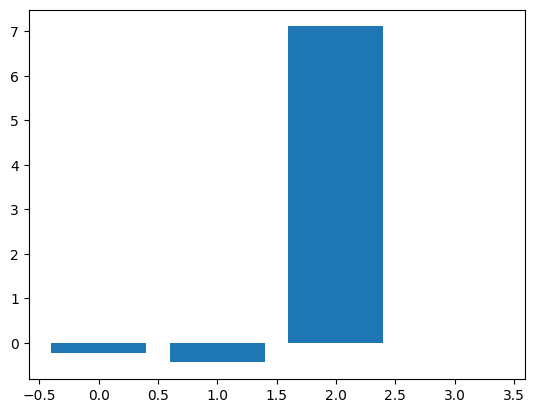

In [99]:
importance = model2.coef_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' %(i,v))
plt.bar([x for x in range(len(importance))],importance)
plt.show()

When we are looking at the feature importance graph, the feature "Avg_rooms" is considered the most important feature for predicting MValue.

**Using Recursive Feature Elimination**

RFE is an iterative method that constantly fits the model and removes the least important feature after every iteration.

Num Features: 2
Selected Features: [False  True  True False]
Feature Ranking: [2 1 1 3]


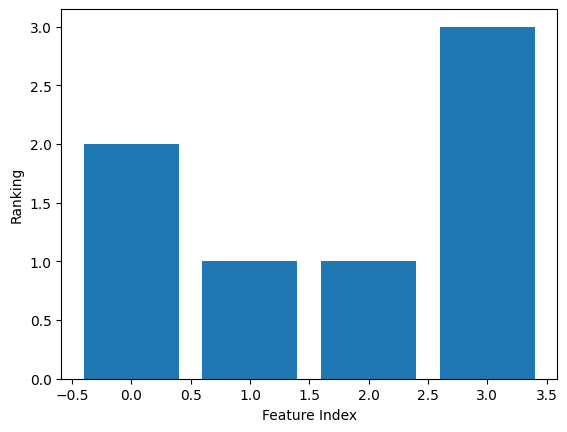

In [100]:
from sklearn.feature_selection import RFE
model = LinearRegression()
rfe = RFE(model, n_features_to_select=2)
fit = rfe.fit(x2, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)
plt.bar(range(len(fit.ranking_)), fit.ranking_)
plt.xlabel('Feature Index')
plt.ylabel('Ranking')
plt.show()

According to the graph, the 2nd and 3rd Feature are the most important. Here the 2nd and 3rd features are Distance and Avg_rooms respectively

**Normalising the predictor variables**

In [69]:
from sklearn import preprocessing
import pandas as pd

xs = preprocessing.normalize(data)
scaled_df = pd.DataFrame(xs, columns=data.columns)
scaled_df.head()

,Crime_Rate,Zone_proportion,Non_Retail_Acres,CHAS,NOX,Avg_rooms,AGE,Distance,RAD,Property_TaxRate,PTRATIO,B,LSTAT,MValue
0,0.000140,0.0,0.005910,0.0,0.000910,0.015165,0.127802,0.007147,0.004090,0.564376,0.036807,0.811597,0.012658,0.067889
1,0.000267,0.0,0.015347,0.0,0.000932,0.012060,0.143249,0.004980,0.008964,0.688454,0.037471,0.707745,0.016889,0.049303
2,0.000205,0.0,0.015365,0.0,0.000933,0.012172,0.127981,0.005127,0.008975,0.689269,0.037515,0.710055,0.013767,0.047567
3,0.000570,0.0,0.021346,0.0,0.001297,0.015972,0.212965,0.006770,0.012469,0.957595,0.052119,0.176557,0.026508,0.046384
4,0.000379,0.0,0.015329,0.0,0.000931,0.010990,0.156513,0.004861,0.008954,0.687652,0.037427,0.706402,0.024068,0.034562


In [70]:
x = scaled_df[["Avg_rooms ","Distance"]]
y = scaled_df["MValue"]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.33)

In [71]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
print(reg.score(xtest,ytest))

0.6516660373346573


In [72]:
print("Model Intercept",reg.intercept_)
print("Model Slope",reg.coef_)

Model Intercept -0.04024788985243681
Model Slope [ 7.55897098 -0.55058849]
